In [1]:
from sklearn import datasets, model_selection
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def plot_contours(ax, sess, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = sess.run(inference,feed_dict={x:np.c_[xx.ravel(), yy.ravel()]})
    Z[Z<0.5]=0
    Z[Z>0.5]=1
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, 1,**params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

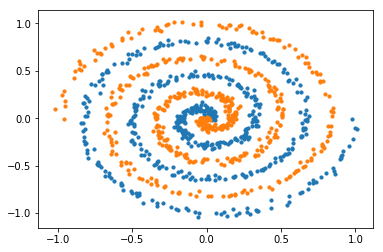

In [4]:
x,y = tf.contrib.learn.datasets.synthetic.spirals(n_loops=3,n_samples=1500,noise=0.02)
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=42)
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],s=10)
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],s=10)
plt.show()

In [5]:
x = tf.placeholder(tf.float32,[None,2], name='input_data')
y = tf.placeholder(tf.float32, [None],name='label')
label = tf.expand_dims(y,1)

regularizer = tf.contrib.layers.l2_regularizer(scale=0.001)
h = tf.layers.dense(x,200, kernel_regularizer=regularizer)
# h = tf.layers.batch_normalization(h,training=training_pl)
h = tf.nn.relu(h)
# h = tf.layers.dropout(h,0.5)
h = tf.layers.dense(h,200, kernel_regularizer=regularizer)
# h = tf.layers.batch_normalization(h,training=training_pl)
h = tf.nn.relu(h)
# h = tf.layers.dropout(h,0.5)
y_ = tf.layers.dense(h,1)

In [6]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=label,logits=y_))
predicted_class = tf.greater(y_,0)
inference = tf.cast(predicted_class,tf.int32)
correct = tf.equal(predicted_class, tf.equal(label,1.0))
accuracy = tf.reduce_mean( tf.cast(correct, tf.float32) )

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = tf.train.AdamOptimizer().minimize(loss=loss)

In [9]:
array_test= np.zeros(1500)
array_train= np.zeros(1500)
batch_size = 500
nb_batch_train = X_train.shape[0]//batch_size
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1500):
    ids = np.random.permutation(X_train.shape[0])
    X_train[ids]
    y_train[ids]
    for step in range(nb_batch_train):
        ran_from = step * batch_size
        ran_to = (step+1) * batch_size
        sess.run(train_op,feed_dict={x:X_train[ran_from:ran_to],
                                     y:y_train[ran_from:ran_to]})
    if epoch % 200 == 199:
        test_acc = sess.run(accuracy, feed_dict={x: X_test,
                                                 y:y_test}) 
        train_acc = sess.run(accuracy, feed_dict={x: X_train,
                                                  y:y_train}) 
        print('epoch %d | train acc = %0.4f | test acc %0.4f '%(epoch, train_acc, test_acc))

    array_test[epoch] = sess.run(accuracy, feed_dict={x: X_test,
                                                      y:y_test}) 
    array_train[epoch] = sess.run(accuracy, feed_dict={x: X_train,
                                                       y:y_train}) 
        

epoch 199 | train acc = 0.6856 | test acc 0.6242 
epoch 399 | train acc = 0.7562 | test acc 0.6869 
epoch 599 | train acc = 0.8577 | test acc 0.7838 
epoch 799 | train acc = 0.9642 | test acc 0.9293 
epoch 999 | train acc = 0.9910 | test acc 0.9657 
epoch 1199 | train acc = 0.9950 | test acc 0.9758 
epoch 1399 | train acc = 0.9950 | test acc 0.9798 


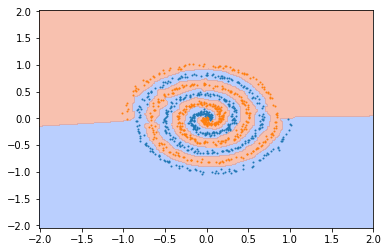

In [10]:
plt.close()
fig, ax = plt.subplots()
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, sess, xx,yy,cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],s=1)
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],s=1)
plt.show()

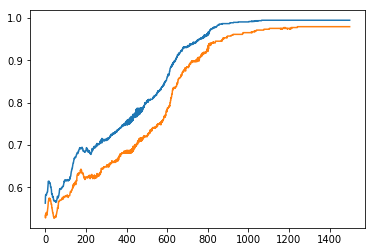

In [11]:
plt.plot(array_train)
plt.plot(array_test)
plt.show()